In [71]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../raw_data/archive/hmnist_28_28_RGB.csv')

In [6]:
df.columns

Index(['pixel0000', 'pixel0001', 'pixel0002', 'pixel0003', 'pixel0004',
       'pixel0005', 'pixel0006', 'pixel0007', 'pixel0008', 'pixel0009',
       ...
       'pixel2343', 'pixel2344', 'pixel2345', 'pixel2346', 'pixel2347',
       'pixel2348', 'pixel2349', 'pixel2350', 'pixel2351', 'label'],
      dtype='object', length=2353)

In [8]:
X_val =
y_val =

X = df.drop(columns=['label'])
y = df['label']

In [41]:
X.shape

(10015, 2352)

In [11]:
X = X/255.0

In [79]:
#Model Architecture ---
model = models.Sequential()

# Input Layer
model.add(layers.Input(shape=(28, 28, 3)))

# Conv Block 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Conv Block 2
# model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))

# # Conv Block 3
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))  # Regularization

# Flatten & Dense
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu',
                       kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))  # Prevent overfitting

# Output Layer
model.add(layers.Dense(7, activation='softmax'))

In [80]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # maybe recall

In [65]:
X_reshaped = X.values.reshape(-1, 28, 28, 3)

In [81]:
es = EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(X_reshaped, y, epochs=50, batch_size=32, validation_split=0.2, callbacks=[es])

Epoch 1/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4984 - loss: 2.0158 - val_accuracy: 0.1063 - val_loss: 1.7467
Epoch 2/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.7023 - loss: 1.0777 - val_accuracy: 0.8337 - val_loss: 1.4447
Epoch 3/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7220 - loss: 0.9324 - val_accuracy: 0.0015 - val_loss: 15.4293
Epoch 4/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.7351 - loss: 0.8592 - val_accuracy: 0.0015 - val_loss: 14.8957
Epoch 5/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.7417 - loss: 0.8088 - val_accuracy: 0.0015 - val_loss: 5.9396
Epoch 6/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7468 - loss: 0.7914 - val_accuracy: 0.8218 - val_loss: 2.9046
Epoch 7/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7510 - loss: 0.7676 - val_accuracy: 0.2896 - val_loss: 9.9811


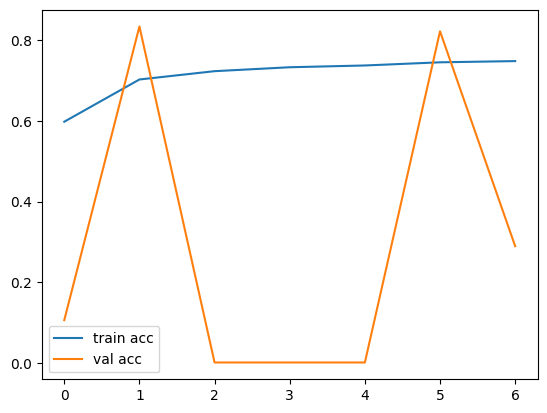

In [82]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [76]:
history.history['accuracy']

[0.5745132565498352,
 0.6905891299247742,
 0.7118073105812073,
 0.7357713580131531,
 0.7395157217979431,
 0.750748872756958,
 0.7579880356788635,
 0.7599850296974182,
 0.7669745087623596,
 0.7666000723838806,
 0.7699700593948364,
 0.7782076597213745,
 0.7807039618492126,
 0.7789565920829773,
 0.7769595384597778]